In [209]:
# Binary Classification Problem
# Dataset provide some info about some people, from the info predict where the 
# loan should be approved.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df = pd.read_csv('train.csv')

df.shape

(614, 13)

In [211]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [213]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [214]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [215]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [216]:
df['Credit_History'].unique()

array([1.0, 0.0, nan], dtype=object)

In [217]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [218]:
df.drop('Loan_ID', axis=1, inplace=True)

In [219]:
df.duplicated().any()

False

The percentage of Y class : 0.69
The percentage of N class : 0.31


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


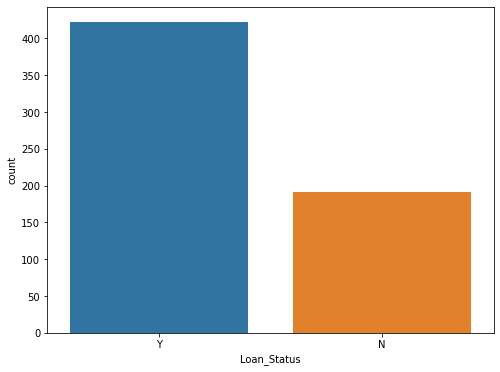

In [220]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

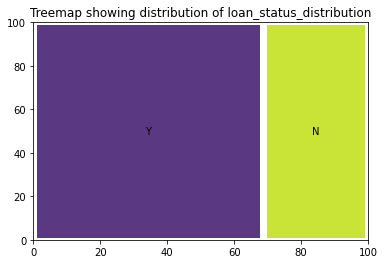

In [221]:
# Univariate analysis on StudyName
loan_status_distribution = df["Loan_Status"].value_counts()

import squarify
from matplotlib import pyplot as plt

ax = squarify.plot(sizes=loan_status_distribution, label=loan_status_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of loan_status_distribution");

In [222]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

<AxesSubplot:xlabel='Dependents', ylabel='count'>

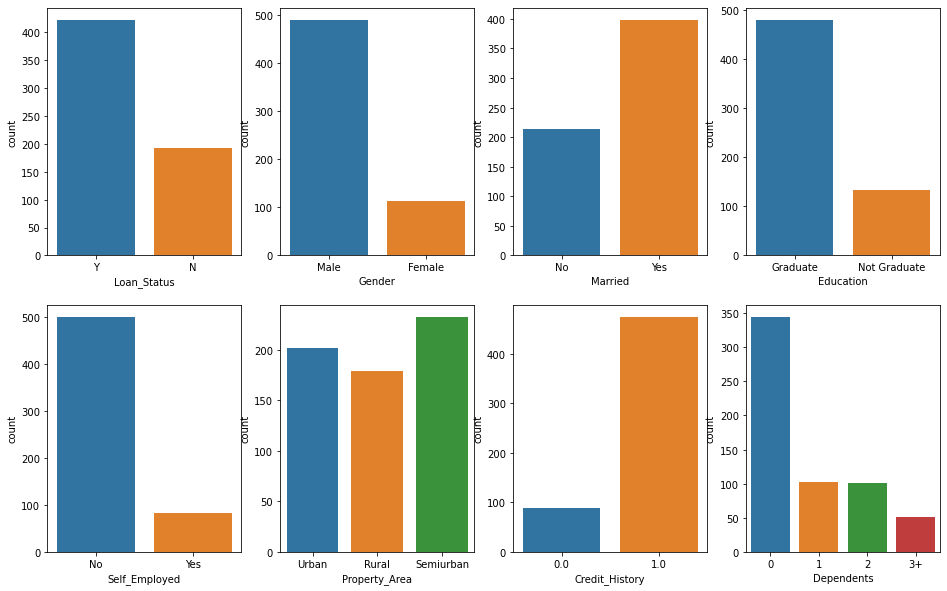

In [223]:
import seaborn as sns
fig, ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status', data = df, ax=ax[0][0])
sns.countplot('Gender', data = df, ax=ax[0][1])
sns.countplot('Married', data = df, ax=ax[0][2])
sns.countplot('Education', data = df, ax=ax[0][3])
sns.countplot('Self_Employed', data = df, ax=ax[1][0])
sns.countplot('Property_Area', data = df, ax=ax[1][1])
sns.countplot('Credit_History', data = df, ax=ax[1][2])
sns.countplot('Dependents', data = df, ax=ax[1][3])

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


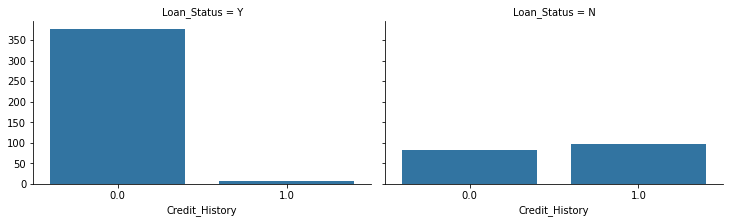

In [224]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

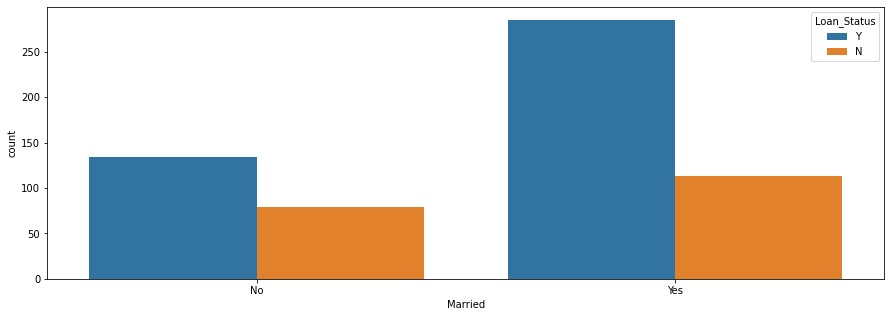

In [225]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

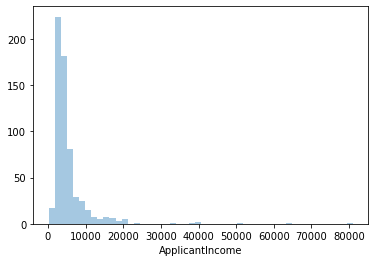

In [226]:
sns.distplot(df.ApplicantIncome,kde=False)

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

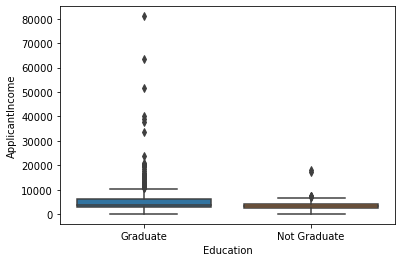

In [227]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

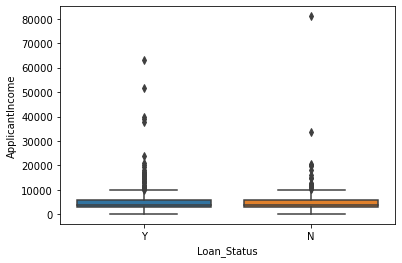

In [228]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)

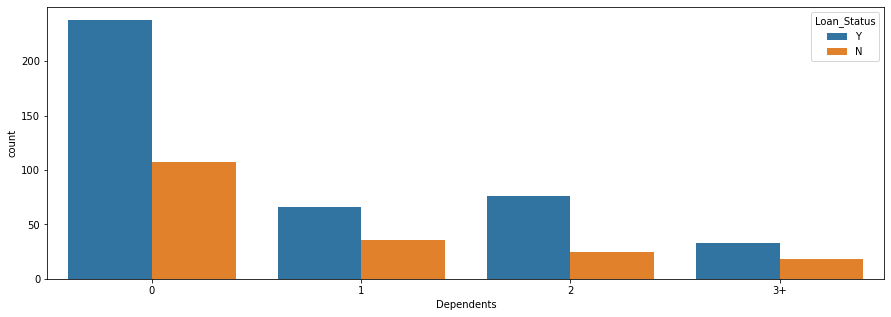

In [229]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


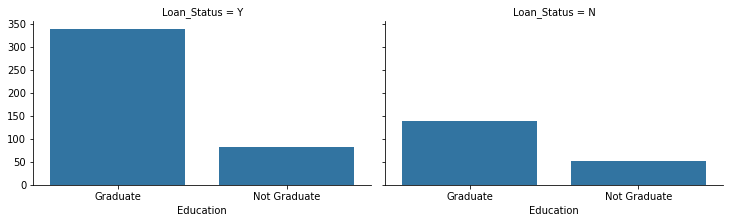

In [230]:
# Education

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

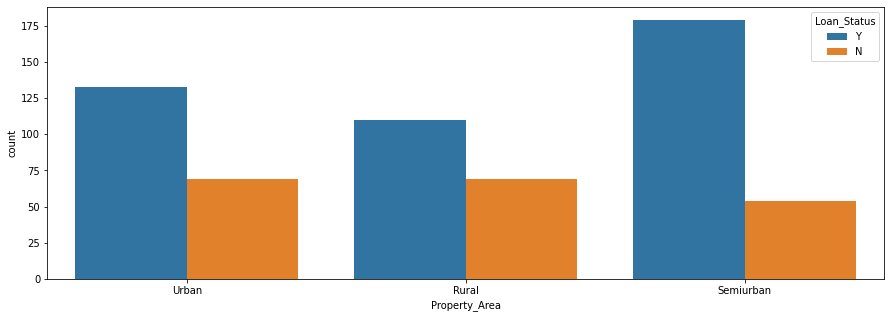

In [231]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

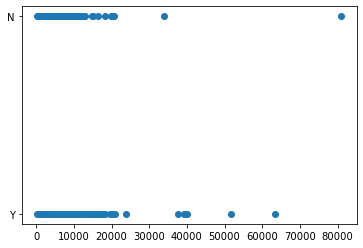

In [232]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

In [233]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [234]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [235]:
# Handling of missing values
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [236]:
# Separating Numerical and categorical data
categorical_data = []
numerical_data = []

for i, c in enumerate(df.dtypes):
    if c == object:
        categorical_data.append(df.iloc[:, i])
    else :
        numerical_data.append(df.iloc[:, i])

In [237]:
categorical_data

[0        Male
 1        Male
 2        Male
 3        Male
 4        Male
         ...  
 609    Female
 610      Male
 611      Male
 612      Male
 613    Female
 Name: Gender, Length: 614, dtype: object,
 0       No
 1      Yes
 2      Yes
 3      Yes
 4       No
       ... 
 609     No
 610    Yes
 611    Yes
 612    Yes
 613     No
 Name: Married, Length: 614, dtype: object,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 609     0
 610    3+
 611     1
 612     2
 613     0
 Name: Dependents, Length: 614, dtype: object,
 0          Graduate
 1          Graduate
 2          Graduate
 3      Not Graduate
 4          Graduate
            ...     
 609        Graduate
 610        Graduate
 611        Graduate
 612        Graduate
 613        Graduate
 Name: Education, Length: 614, dtype: object,
 0       No
 1       No
 2      Yes
 3       No
 4       No
       ... 
 609     No
 610     No
 611     No
 612     No
 613    Yes
 Name: Self_Employed, Length: 614, dtyp

In [238]:
categorical_data = pd.DataFrame(categorical_data).transpose()
numerical_data = pd.DataFrame(numerical_data).transpose()

In [239]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [240]:
categorical_data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [241]:
categorical_data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [242]:
categorical_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [243]:
categorical_data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [244]:
categorical_data['Credit_History'].unique()

array([1.0, 0.0, nan], dtype=object)

In [245]:
numerical_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [246]:
# fill every column with its own most frequent value (mode)
categorical_data = categorical_data.apply(lambda x:x.fillna(x.value_counts().index[0]))


# OR
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# df['Married'].fillna(df['Married'].mode()[0], inplace=True)
# df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
# df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
# df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
# df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [247]:
categorical_data.isnull().sum().sort_values(ascending=False)

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [248]:
#fill every missing value with their previous value in the same column

numerical_data.fillna(method='bfill', inplace=True)


# OR fill null with mean
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [249]:
numerical_data.isnull().sum().any() 

False

In [250]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [251]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = categorical_data['Loan_Status']
categorical_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [252]:
# transform other columns

for i in categorical_data:
    categorical_data[i] = le.fit_transform(categorical_data[i])

In [253]:
target

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [254]:
categorical_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0
610,1,1,3,0,0,1,0
611,1,1,1,0,0,1,2
612,1,1,2,0,0,1,2


In [255]:
# impute cat and numerical data back into dataframe
df = pd.concat([categorical_data, numerical_data, target], axis=1)

In [256]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [257]:
X = pd.concat([categorical_data, numerical_data], axis=1)
y = target

In [258]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,2900.0,0.0,71.0,360.0
610,1,1,3,0,0,1,0,4106.0,0.0,40.0,180.0
611,1,1,1,0,0,1,2,8072.0,240.0,253.0,360.0
612,1,1,2,0,0,1,2,7583.0,0.0,187.0,360.0


In [259]:
y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [260]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape',X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [261]:
# different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [262]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [263]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 8.863
  acc: 0.743
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.612
  acc: 0.809
------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [264]:
# train_eval_cross

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter

 pre     0.894048
 rec     0.422500
 f1      0.562733
 loss    6.752695
 acc     0.804490
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.379834
 rec      0.207500
 f1       0.259954
 loss    12.381887
 acc      0.641510
Name: 0, dtype: float64
------------------------------
SVC :


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.043955
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:
# thus far it appears logistic regression as the best model

In [266]:
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

print(classification_report(y_test, y_predict))

LR_SC = accuracy_score(y_predict, y_test)
print('accuracy is', accuracy_score(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88        85
           1       0.86      0.47      0.61        38

    accuracy                           0.81       123
   macro avg       0.83      0.72      0.74       123
weighted avg       0.82      0.81      0.79       123

accuracy is 0.8130081300813008


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [267]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

print(classification_report(y_test, y_predict))

RF_SC = accuracy_score(y_predict, y_test)
print('accuracy is', accuracy_score(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        85
           1       0.63      0.50      0.56        38

    accuracy                           0.76       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.75      0.76      0.75       123

accuracy is 0.7560975609756098


<AxesSubplot:>

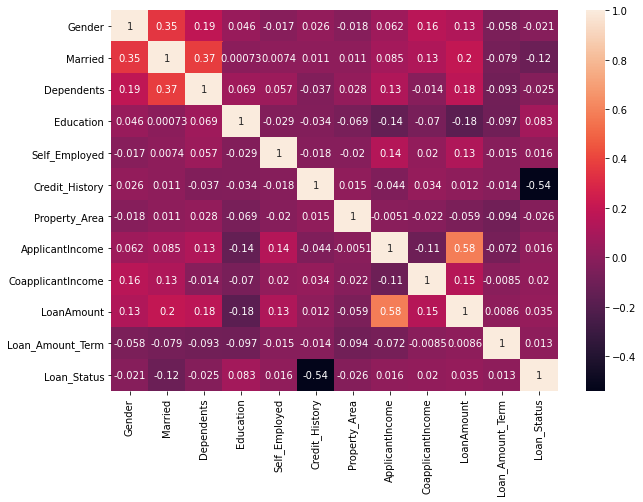

In [268]:
# Executing feature engineer
# not all feature are necessarily important
# Purpose is to find the best set of features that allows 
# one to build optimized models of studied phenomena

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

In [269]:
#correlation table
corr = data_corr.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-269-c0317bd6e1df>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
Gender,1.00,0.35,0.19,0.05,-0.02,0.03,-0.02,0.06,0.16,0.13,-0.06,-0.02
Married,0.35,1.00,0.37,0.00,0.01,0.01,0.01,0.09,0.13,0.20,-0.08,-0.12
Dependents,0.19,0.37,1.00,0.07,0.06,-0.04,0.03,0.13,-0.01,0.18,-0.09,-0.03
Education,0.05,0.00,0.07,1.00,-0.03,-0.03,-0.07,-0.14,-0.07,-0.18,-0.10,0.08
Self_Employed,-0.02,0.01,0.06,-0.03,1.00,-0.02,-0.02,0.14,0.02,0.13,-0.01,0.02
Credit_History,0.03,0.01,-0.04,-0.03,-0.02,1.00,0.01,-0.04,0.03,0.01,-0.01,-0.54
Property_Area,-0.02,0.01,0.03,-0.07,-0.02,0.01,1.00,-0.01,-0.02,-0.06,-0.09,-0.03
ApplicantIncome,0.06,0.09,0.13,-0.14,0.14,-0.04,-0.01,1.00,-0.11,0.58,-0.07,0.02
CoapplicantIncome,0.16,0.13,-0.01,-0.07,0.02,0.03,-0.02,-0.11,1.00,0.15,-0.01,0.02
LoanAmount,0.13,0.20,0.18,-0.18,0.13,0.01,-0.06,0.58,0.15,1.00,0.01,0.03


In [270]:
X_train['Income'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']

X_train['Total Loan Amount'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term']


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:>

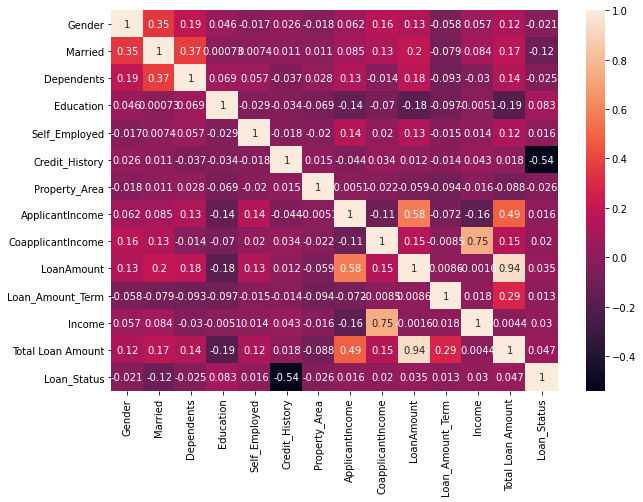

In [271]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

In [272]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

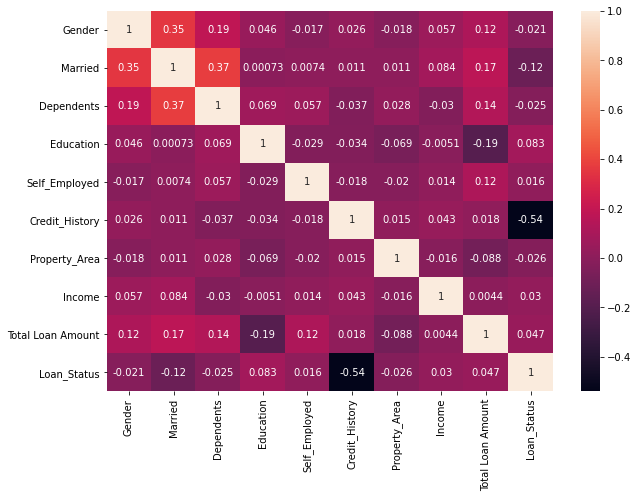

In [273]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Loan Amount', ylabel='Density'>

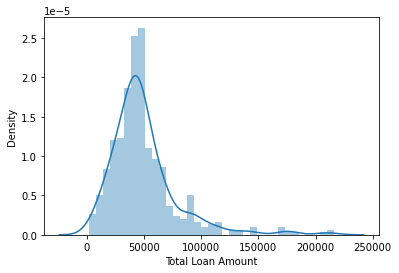

In [274]:
sns.distplot(X_train['Total Loan Amount'])

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Loan Amount', ylabel='Density'>

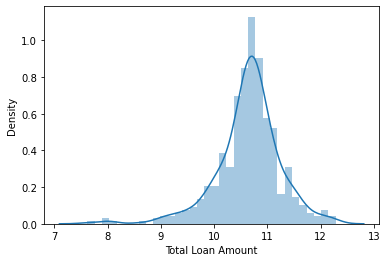

In [275]:
X_train['Total Loan Amount'] = np.log(X_train['Total Loan Amount'])  # logarithm of all the values
sns.distplot(X_train['Total Loan Amount'])

In [276]:
print(X_train['Income'].value_counts())

0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: Income, Length: 270, dtype: int64


In [277]:
# most of our data is 0 , so we will try to change other values to 1

print('before:')
print(X_train['Income'].value_counts())

X_train['Income'] = [x if x==0 else 1 for x in X_train['Income']]
print('-'*50)
print('\nafter:')
print(X_train['Income'].value_counts())

before:
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: Income, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    269
0.0    222
Name: Income, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


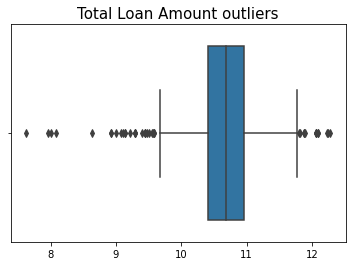

In [278]:
# we will use boxplot to detect outliers

sns.boxplot(X_train['Total Loan Amount']);
plt.title('Total Loan Amount outliers', fontsize=15);
plt.xlabel('');

In [279]:
threshold = 1.5  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 
            
Total_Loan_Amount_out = X_train['Total Loan Amount']
q25, q75 = np.percentile(Total_Loan_Amount_out, 25), np.percentile(Total_Loan_Amount_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in Total_Loan_Amount_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['Total Loan Amount'] > upper) | (data_outliers['Total Loan Amount'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.8179046195970114
Lower: 9.598103480688962
Upper: 11.779182466280993
Nubers of Outliers: 39
outliers:[12.092679958175083, 8.930626469173578, 7.620705086838262, 12.254862809699606, 7.965545573129992, 9.574983485564092, 9.392661928770137, 9.578311275656766, 9.587406005562649, 9.112948025967533, 8.006367567650246, 9.144200569471638, 9.287301413112312, 9.441452092939569, 9.287301413112312, 12.059890135352092, 8.626944055375356, 9.51044496442652, 11.81569317484005, 9.441452092939569, 8.922658299524402, 9.287301413112312, 11.889991098556695, 12.059890135352092, 12.059890135352092, 12.231740392278752, 9.469622969906265, 9.137769679141348, 11.799607037088427, 9.084777149000837, 9.21830854162536, 8.99961934066053, 8.083328608786376, 12.283033686666302, 9.549665677579801, 11.877568578558138, 11.877568578558138, 12.100712129872347, 9.441452092939569]

len X_train before dropping the outliers 491
le

In [280]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


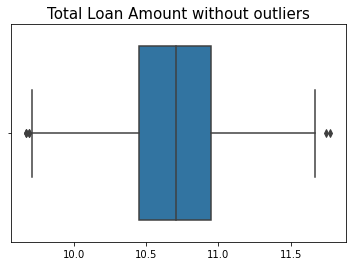

In [281]:
sns.boxplot(X_train['Total Loan Amount']);
plt.title('Total Loan Amount without outliers', fontsize=15);
plt.xlabel('');

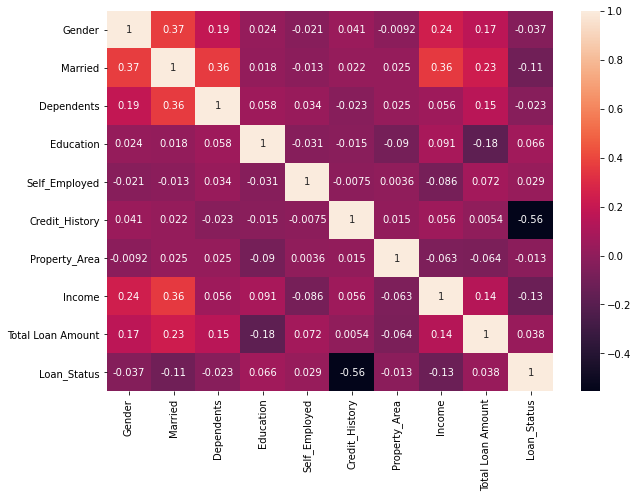

In [282]:
# Self_Employed got really bad corr (-0.00061) , let's try remove it and see what will happen

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [283]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
182,1,1,0,0,0,1,1,4600.0,0.0,73.0,180.0
440,1,0,0,0,0,1,1,3660.0,5064.0,187.0,360.0
276,1,1,0,0,0,1,1,3993.0,3274.0,207.0,360.0
533,1,0,1,0,0,1,1,11250.0,0.0,196.0,360.0
504,1,1,0,1,0,1,1,3814.0,1483.0,124.0,300.0


In [284]:
X_test_new = X_test.copy()

In [285]:
x = []

X_test_new['Income'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['Total Loan Amount'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['Total Loan Amount'] = np.log(X_test_new['Total Loan Amount'])

X_test_new['Income'] = [x if x==0 else 1 for x in X_test_new['Income']]

In [286]:
X_test_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Total Loan Amount
182,1,1,0,0,0,1,1,0.0,9.483416
440,1,0,0,0,0,1,1,1.0,11.117213
276,1,1,0,0,0,1,1,1.0,11.218823
533,1,0,1,0,0,1,1,0.0,11.164219
504,1,1,0,1,0,1,1,1.0,10.524064


In [287]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Total Loan Amount
415,0,0,0,0,0,1,2,0.0,9.980449
26,1,1,0,0,0,1,1,1.0,10.690125
394,1,1,2,0,0,1,2,1.0,10.613492
584,1,1,1,0,0,0,0,1.0,10.869711
86,1,1,2,1,0,1,1,1.0,10.481224


In [288]:
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test_new)

print(classification_report(y_test, y_predict))

LR_SC = accuracy_score(y_predict, y_test)
print('accuracy is', accuracy_score(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        85
           1       0.85      0.45      0.59        38

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123

accuracy is 0.8048780487804879


In [290]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.423889
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.753651
 rec     0.335714
 f1      0.453839
 loss    8.416145
 acc     0.756329
Name: 0, dtype: float64
------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

SVC :
 pre     0.643333
 rec     0.235714
 f1      0.340616
 loss    8.406109
 acc     0.756618
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_


 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.347135
 acc     0.816232
Name: 0, dtype: float64
------------------------------
